In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from importlib import reload
import pandas as pd
import numpy as np
import sys 
sys.path.append('/Users/Santiago PC/Documents/Photometry/Quarter1/alignment_with_ethovision/')
import photometry_3
import alignment_with_ethovision
get_ipython().magic('matplotlib qt5')
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
reload(alignment_with_ethovision)

In [2]:
##import ethovision output into pandas dataframe

path_to_photometry_file = '/Users/Santiago PC/Documents/Photometry Data S2/07102019/19710002_F_F0.h5'
path_to_ethovision_file = '/Users/Santiago PC/Documents/Photometry Data S2/07102019/Raw data-07102019_Ai96d1cre002-Trial     1.xlsx'
syn_pulses_df_file = '/Users/Santiago PC/Documents/Photometry Data S2/07102019/20190710_Ai96d1cre002_002abf_1TTL_pulse_times.csv'

In [3]:
ethovision_df = alignment_with_ethovision.read_ethovision_dataframe(path_to_ethovision_file, 32, ['Digging Manual', 'Acceleration',])

In [ ]:
ethovision_df

In [4]:
syn_pulses_df = alignment_with_ethovision.read_sync_dataframe(syn_pulses_df_file)

In [ ]:
syn_pulses_df

In [5]:
photometry_df = pd.read_hdf(path_to_photometry_file)

In [ ]:
photometry_df

In [ ]:
#ethovision_df

Text(0,0.5,'Acceleration state(center-point / High acceleration)')

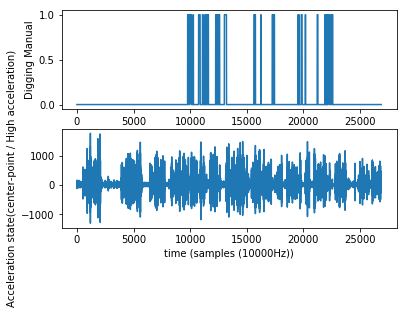

In [6]:
#plt.plot(ethovision_df['Acceleration'].values)
#plt.show()

plt.subplot(2,1,1)
plt.plot(ethovision_df['Digging Manual'].values)
plt.xlabel('time (samples (10000Hz))')
plt.ylabel('Digging Manual')
plt.subplot(2,1,2)
plt.plot(ethovision_df['Acceleration'].values)
plt.xlabel('time (samples (10000Hz))')
plt.ylabel('Acceleration state(center-point / High acceleration)')

In [7]:
df_compiled = alignment_with_ethovision.loop_over_photometry_sweeps_and_align(photometry_df, ethovision_df, ['Digging Manual'], syn_pulses_df)

upsampling behavior data for sweep0
upsampling behavior data for sweep1
upsampling behavior data for sweep2
upsampling behavior data for sweep3
upsampling behavior data for sweep4
upsampling behavior data for sweep5
upsampling behavior data for sweep6
upsampling behavior data for sweep7


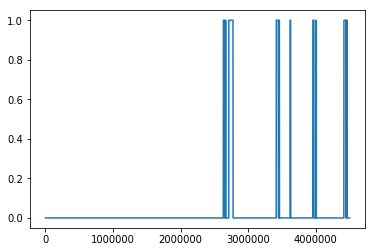

In [11]:
plt.plot(df_compiled['Digging Manual'].values)
plt.show()

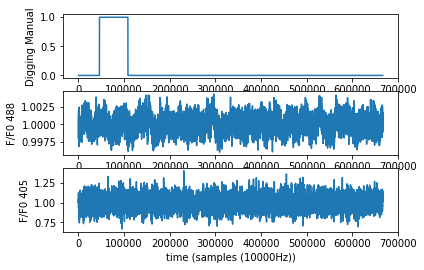

In [13]:
sweep_num = 'sweep006'

plt.subplot(3,1,1)
plt.plot(df_compiled.loc[sweep_num]['Digging Manual'].values)
plt.xlabel('time (samples (10000Hz))')
plt.ylabel('Digging Manual')
plt.subplot(3,1,2)
plt.plot(df_compiled.loc[sweep_num]['channel_1_demod_F_F0'].values)
plt.xlabel('time (samples (10000Hz))')
plt.ylabel('F/F0 488')
plt.subplot(3,1,3)
plt.plot(df_compiled.loc[sweep_num]['channel_2_demod_F_F0'].values)
plt.xlabel('time (samples (10000Hz))')
plt.ylabel('F/F0 405')
plt.show()

In [14]:
path_to_file_output = path_to_photometry_file.rstrip('.h5')+ 'behavior_added.h5'
df_compiled.to_hdf(path_to_file_output, key='df', mode='w')

In [ ]:
#goodfromhere #goodfromhere

In [ ]:
### ax1 = plt.subplots()
ax1.plot(dfs_with_behavior_data[sweep_num]['video_times_from_sync'].values, dfs_with_behavior_data[sweep_num]['grooming'].values, label = 'grooming')
ax1.set_xlabel('time in video (seconds)')
ax2 = ax1.twiny()
ax2.spines['bottom'].set_position(('axes', -1))
ax2.set_xlabel('frame number')
ax2.plot(dfs_with_behavior_data[sweep_num]['frame'].values, dfs_with_behavior_data[sweep_num]['channel_1_demod_F_F0'].values)
ax2.plot(dfs_with_behavior_data[sweep_num]['frame'].values, dfs_with_behavior_data[sweep_num]['channel_2_demod_F_F0'].values)
plt.show()

In [ ]:
path_to_file = '/Users/johnmarshall/Documents/Analysis/PhotometryData/July2018/07302018/18730003_F_F0_grooming_sweep001.h5'
data = pd.read_hdf(path_to_file)

In [ ]:
behavior_df 

In [ ]:
syn_pulses_df

In [ ]:
from numpy.random import rand
import matplotlib
matplotlib.use('gtkagg')
import matplotlib.pyplot as plt

# create all axes we need
ax0 = plt.subplot(211)
ax1 = ax0.twinx()
ax2 = plt.subplot(212)
ax3 = ax2.twinx()

# share the secondary axes
ax1.get_shared_y_axes().join(ax1, ax3)

ax0.plot(rand(1) * rand(10),'r')
ax1.plot(10*rand(1) * rand(10),'b')
ax2.plot(3*rand(1) * rand(10),'g')
ax3.plot(10*rand(1) * rand(10),'y')
plt.show()